# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


**Общая информация**

**Срок сдачи:** 25 апреля 18:00 Сдача **очная** на онлайн занятии.


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0422, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?



> $$w_{new} = w_{old} - \alpha{\Large[}\dfrac{2}{n}\sum_{i = 1}^{n} {\large(}(\overrightarrow{x_i}, \overrightarrow{w_{old}}) - y_i{\large)} \overrightarrow{x_i} + \dfrac{2}{C}\overrightarrow w_{old}{\Large]}$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.



> $$w_{new} = w_{old} - \alpha{\Large[}\dfrac{2}{n}\sum_{i = 1}^{n} (y_i - a_i) \overrightarrow{x_i} + \dfrac{2}{C}\overrightarrow w_{old}{\Large]},$$
$$a_i = \sigma((x_i, w)) = \dfrac{1}{1 + exp(-(x_i, w))}$$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?



> Гессиан $L(w)$ равен $\dfrac{1}{N}X^TX$. В случае, когда матрица $X$ имеет строк не меньше, чем столбцов, и имеет полный ранг, матрица $X^TX$ обратима, а значит решение существует. Для того, чтобы оно являлось точкой минимума необходимо и достаточно, чтобы дополнительно Гессиан был положительно определён. Из условия на ранг матрицы $X$ следует, что все столбцы этой матрицы (то есть, признаки) линейно независимы. Таким образом, элементы матрицы $X^TX$ являются скалярными произведениями ЛНЗ векторов, то есть $X^TX$ - матрица Грама, а следовительно, положительно определена.

> Если матрица $X$ имеет линейно зависимые признаки (столбцы), то матрица $X^TX$ необратима. При использовании модели с $L2$ регуляризацией мы получаем точное решение в виде:
$$ w = {\large(} \dfrac{1}{N} X^TX + \dfrac{1}{C} I{\large)}^{-1} X^Ty $$
Матрица $\dfrac{1}{N} X^TX + \dfrac{1}{C} I$ является обратимой, а поэтому решение задачи минимизации $L(w)$ существует. При регуляризации мы получаем смещённое решение, которое сходится к 0 при уменьшении $C$ и приближается к истинному решению при увеличении $C$.





Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$



> Для минимизации математического ожидания функции потерь посчитаём его производную по $a(x_i)$ и приравняем к нулю.
$$ \dfrac{\partial}{\partial a} E(L | x_i) = -\dfrac{p(y_i = 1 | x_i)}{a(x_i)} + \dfrac{p(y_i = 0 | x_i)}{1 - a(x_i)} = 0$$
>
> $$ a(x_i) = \dfrac{p(y_i = 1 | x_i)}{p(y_i = 1 | x_i) + p(y_i = 0 | x_i)} = p(y_i = 1 | x_i)$$



Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$



> Мы рассматриваем модель линейной регресси, в которой
$$ y = w_0 + \sum_{i = 1}{D} x_i w_i + 𝜀 $$
Согласно условиям Гаусса-Маркова для задачи линейной регрессии математическое ожидание случайного члена $𝜀$ должно быть равно нулю для любого фиксированного вектора $x$. В случае исключения свободного члена из модели, для вектора $x$, содержащего все нулевые признаки, мы получаем, что матожидание случайного члена не равно нулю.

> Регуляризация модели линейной регрессии позволяет решить проблему, возникающую, когда незначительное изменение признака приводит к значительным изменениям результата регрессии. Свободному члену соответствует признак $x_0$, значение которого постоянно для всех объектов, а значит и указанная проблема для него не возникает. Поэтому свободный член не нуждается в регуляризации.




#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [ ]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [ ]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [ ]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [ ]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [18]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """

    idx = np.arange(X.shape[0])
    if shuffle:
        np.random.shuffle(idx)

    X_batch = np.zeros((batch_size, X.shape[1]))
    y_batch = np.zeros(batch_size)
    for i in range(X.shape[0] // batch_size):
        X_batch = X[idx[i * batch_size:(i + 1) * batch_size], :]
        y_batch = y[idx[i * batch_size:(i + 1) * batch_size]].ravel()
        yield (X_batch, y_batch)
    if (X.shape[0] % batch_size > 0):
        X_batch = X[-(X.shape[0] % batch_size):, :]
        y_batch = y[-(X.shape[0] % batch_size):].ravel()
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [116]:
#%%pycodestyle

def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """

    sigm_value_x = np.ones(x.shape) / (np.ones(x.shape) + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', batch_size=1, border=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        batch_size - размер выделяемых из памяти батчей
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.batch_size = batch_size
        self.border = border

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        if self.model_type == "lin_reg":
            loss = y_batch - (X_batch @ self.weights.reshape(-1, 1)).ravel()
            loss = np.dot(loss, loss) / X_batch.shape[0]
            loss += np.dot(self.weights[1:], self.weights[1:]) / self.C
        else:
            a = sigmoid(X_batch @ self.weights.reshape(-1, 1))
            loss = -np.dot(y_batch / y_batch.shape[0], np.log(a + 0.000001))
            loss -= np.dot(np.ones(y_batch.shape) - y_batch, np.log(np.ones(a.shape)* 1.000001 - a) / y_batch.shape[0])
            loss += np.dot(self.weights[1:], self.weights[1:]) / self.C
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """

        if self.model_type == "lin_reg":
            loss_grad = ((X_batch @ self.weights.reshape(-1, 1)).ravel() - y_batch).reshape(1, -1)
            loss_grad = 2 * (loss_grad / X_batch.shape[0] @ X_batch)
            loss_grad = loss_grad.ravel() + 2 * np.concatenate(([0], self.weights[1:])) / self.C
        else:
            a = sigmoid(X_batch @ self.weights)
            #loss_grad = - (y_batch * (np.ones(a.shape) - a)) @ X_batch / y_batch.shape[0]
            #loss_grad -= ((np.ones(y_batch.shape) - y_batch) * a) @ X_batch / y_batch.shape[0]
            loss_grad = 2 * np.concatenate((np.zeros(1), self.weights[1:])) / self.C
            loss_grad -= (y_batch - a) / y_batch.shape[0] @ X_batch
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''

        # Нужно инициализровать случайно веса
        self.weights = np.asarray(np.random.rand(X.shape[1] + 1), dtype=np.float128)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = np.concatenate((np.ones((new_batch[0].shape[0], 1)), new_batch[0]), axis=1)
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # Я думаю, после, так как тогда последняя ошибка соответствует обученной модели
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
            #print("Epoch: " + str(n) + "\t " + str(np.mean(self.errors_log['loss'][-int(np.ceil(y.shape[0] / self.batch_size)):])))
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        y_hat = (np.hstack((np.ones((X.shape[0], 1)), X)) @ self.weights.reshape(-1, 1)).ravel()
        if self.model_type == 'log_reg':
            y_hat = np.asarray(sigmoid(y_hat) > self.border, dtype=int)
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [142]:
def plot_decision_boundary(clf, X, y):
    clf.fit(X, y)
    print(clf.weights)
    xx = np.linspace(-5, 8, 100)
    yy = - (clf.weights[0] * np.ones(X.shape[0]) + X[:, 0] * clf.weights[1]) / clf.weights[2]
    plt.plot(X[:, 0], yy)

[-7.94728592  1.60858431 -1.91465305]


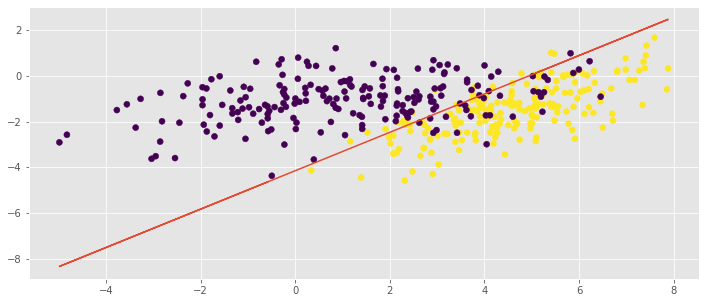

In [145]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

gen = batch_generator
plot_decision_boundary(MySGDClassifier(gen, C=10000, alpha=0.01, max_epoch=1000, model_type='log_reg', batch_size=1), X, y)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [ ]:
from sklearn.datasets import make_classification, make_regression

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

1
2
3
4
5


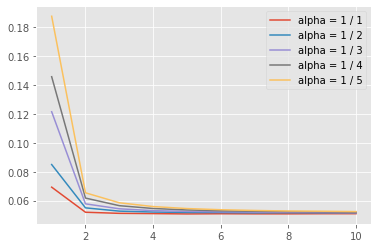

In [ ]:
error=[]

N = 100
for k in range(1,6):
    clf=MySGDClassifier(batch_generator,C=1000000, alpha=1 / k, max_epoch=10, model_type='log_reg', batch_size=100)
    clf.fit(X, y)
    a = clf.errors_log['loss']
    errors_k = np.asarray(a[len(a) % N:]).reshape(-1, N)
    error.append(np.mean(errors_k, axis=1))
    print(k)

fig, ax = plt.subplots()

for i in range(5):
    ax.plot(np.linspace(1, 10, len(error[i])), error[i], label=f"alpha = 1 / {i + 1}")
ax.legend()

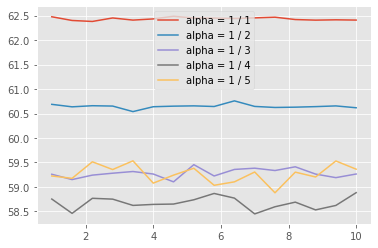

In [ ]:
fig, ax = plt.subplots()
new_len = len(error[0]) * 4 // 5

for i in range(5):
    ax.plot(np.linspace(1, 10, new_len), error[i][-new_len:], label=f"alpha = 1 / {i + 1}")
ax.legend()

In [ ]:
X, y = make_regression(n_samples=10000, n_features=10, noise=8, shuffle=True)

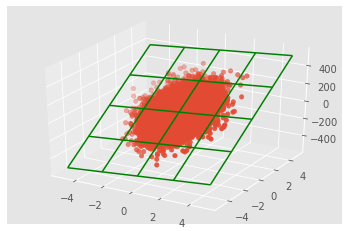

In [ ]:
clf=MySGDClassifier(batch_generator, C=1000000, alpha=1 / k, max_epoch=100, model_type='lin_reg', batch_size=10)
clf.fit(X, y)

fig = plt.figure()
ax = plt.axes(projection='3d')

def f(x, y):
    return y * clf.weights[2] + x * clf.weights[1] + clf.weights[0]

ax.scatter(X[:, 0], X[:, 1], y)
x1 = np.linspace(-5, 5, 5)
y1 = np.linspace(-5, 5, 5)
X1, Y1 = np.meshgrid(x1, y1) 
Z = f(X1, Y1)
ax.plot_wireframe(X1, Y1, Z, color="g")

1
2
3
4
5
6
7
8
9
10


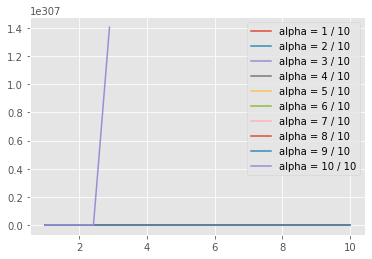

In [ ]:
error=[]

N = 500
for k in range(1, 11):
    clf=MySGDClassifier(batch_generator, C=1000000, alpha=k / 10, max_epoch=100, model_type='lin_reg', batch_size=100)
    clf.fit(np.asarray(X, dtype=np.float128), np.asarray(y, dtype=np.float128))
    a = clf.errors_log['loss']
    errors_k = np.asarray(a[len(a) % N:]).reshape(-1, N)
    error.append(np.mean(errors_k, axis=1))
    print(k)

fig, ax = plt.subplots()

for i in range(10):
    ax.plot(np.linspace(1, 10, len(error[i])), error[i], label=f"alpha = {i + 1} / 10")
ax.legend()

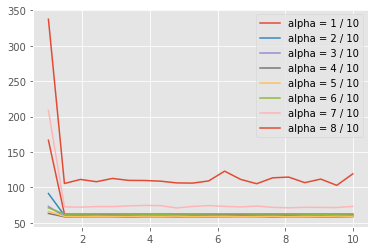

In [ ]:
fig, ax = plt.subplots()

for i in range(8):
    ax.plot(np.linspace(1, 10, len(error[i])), error[i], label=f"alpha = {i + 1} / 10")
ax.legend()

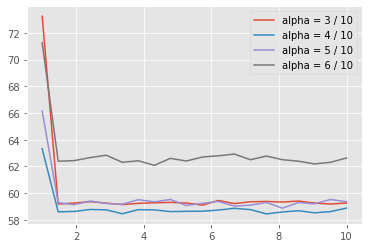

In [ ]:
fig, ax = plt.subplots()

for i in range(2, 6):
    ax.plot(np.linspace(1, 10, len(error[i])), error[i], label=f"alpha = {i + 1} / 10")
ax.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: overflow encountered in longdouble_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:79: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in matmul
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in matmul


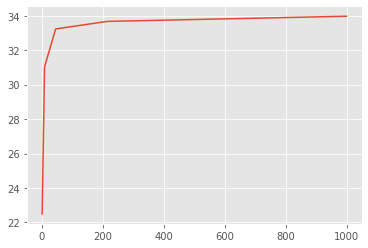

In [ ]:
C = np.logspace(3, -3, 10)
w_mean = []

for i in C:
    clf = MySGDClassifier(batch_generator, C=i, alpha=0.5, max_epoch=100, model_type='lin_reg', batch_size=100)
    with np.errstate(invalid='ignore'):
        with np.errstate(over='ignore'):
            clf.fit(np.asarray(X, dtype=np.float128), np.asarray(y, dtype=np.float128))
    w_mean.append(np.abs(clf.weights).mean())

plt.plot(C, w_mean)

In [ ]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

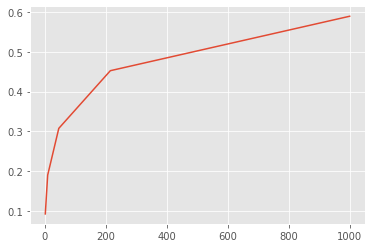

In [ ]:
C = np.logspace(3, -3, 10)
w_mean = []

for i in C:
    clf = MySGDClassifier(batch_generator, C=i, alpha=0.5, max_epoch=100, model_type='log_reg', batch_size=100)
    with np.errstate(invalid='ignore'):
        with np.errstate(over='ignore'):
            clf.fit(np.asarray(X, dtype=np.float128), np.asarray(y, dtype=np.float128))
    w_mean.append(np.abs(clf.weights).mean())

plt.plot(C, w_mean)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [20]:
doc_to_title = {}
with open('/content/docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [119]:
import pandas as pd
train_data = pd.read_csv('/content/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [120]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15])
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [24]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X = scaler.transform(X_train)

In [80]:
for i in [1, 5, 10, 20, 50, 100, 200, 500]:
    clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=100, model_type='log_reg', batch_size=i)
    clf.fit(X, y_train)
    print(i, f1_score(y_train, clf.predict(X)))

1 0.5580969807868252
5 0.5792742726381171
10 0.25656414103525876
20 0.600851600693897
50 0.5800306174519476
100 0.5976312419974391
200 0.5800851063829787
500 0.5958749597164036


0.46610098289496083957
[array([0.42979176], dtype=float128), array([0.11372353], dtype=float128), array([0.68268565], dtype=float128), array([0.94221488], dtype=float128), array([0.45518174], dtype=float128), array([0.16801869], dtype=float128), array([0.31246843], dtype=float128), array([0.54097252], dtype=float128), array([0.31595638], dtype=float128), array([0.50976009], dtype=float128), array([0.62502063], dtype=float128), array([0.36344822], dtype=float128), array([0.3933373], dtype=float128), array([0.29989997], dtype=float128), array([0.56496437], dtype=float128), array([0.45821457], dtype=float128), array([0.36734586], dtype=float128), array([1.10814149], dtype=float128), array([0.52133102], dtype=float128), array([0.04519861], dtype=float128)]


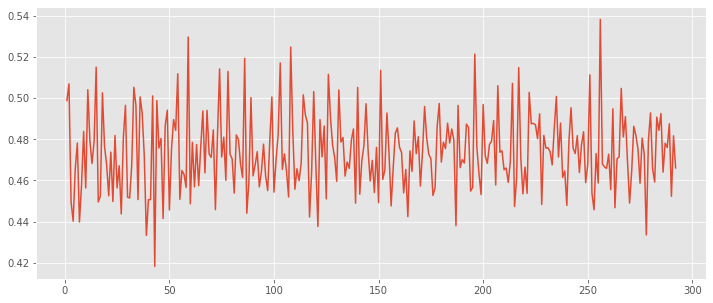

In [103]:
clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=50, model_type='log_reg', batch_size=20)
clf.fit(X, y_train)
a = clf.errors_log['loss']
N = 100
print(np.mean(a[-N:]))
y = np.mean(np.asarray(a[len(a) % N:]).reshape(-1, N), axis=1)
plt.plot(np.arange(1, len(y) + 1), y)
#print(y)
print(clf.errors_log['loss'][-20:])
#print(np.mean(errors_k, axis=1))

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [64]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [65]:
skf = StratifiedKFold(n_splits=5)
data_folds = skf.split(X, y_train)

In [104]:
skf = StratifiedKFold(n_splits=3)
clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=100, model_type='log_reg', batch_size=20)
cross_val_score(clf, X, y_train, cv=skf.split(X, y_train, groups_train), scoring='f1')

array([0.53479853, 0.5568369 , 0.65615927])

In [98]:
fig = plt.figure()
#x = np.arange(1, 10)
y = np.zeros((9, 5, 6))
a = np.zeros((9, 5, 6, 3))
C = [1, 10, 100, 1000, 10000]
max_epochs = [50, 100, 200, 500, 1000]

j = 4
#for j in range(5):
for k in range(5):
    for i in range(1, 10):
        clf = MySGDClassifier(batch_generator, C=C[k], alpha=i / 10, max_epoch=100, model_type='log_reg', batch_size=20)
        # clf.fit(X, y_train)
        a[i - 1, j, k] = cross_val_score(clf, X, y_train, cv=skf.split(X, y_train, groups_train), scoring='f1')
        y[i - 1, j, k] = a[i - 1].mean()
        print(i - 1, j, k, y[i-1, j, k])
print(y.argmax())
print(y)
#plt.plot(x, y)

0 4 0 0.012972046803183056
1 4 0 0.013567634654060957


KeyboardInterrupt: ignored

<Figure size 864x360 with 0 Axes>

1 [0.5581185  0.61984483 0.62620493]
2 [0.56612319 0.61544885 0.60282776]
3 [0.55996223 0.61725293 0.61838235]
4 [0.53968254 0.6086543  0.6503468 ]
5 [0.53069719 0.51518692 0.59647303]
6 [0.55016803 0.45287793 0.54361283]
7 [0.51807879 0.54267948 0.61660865]
8 [0.55105032 0.50089233 0.4776485 ]
9 [0.53213909 0.50363196 0.58941799]


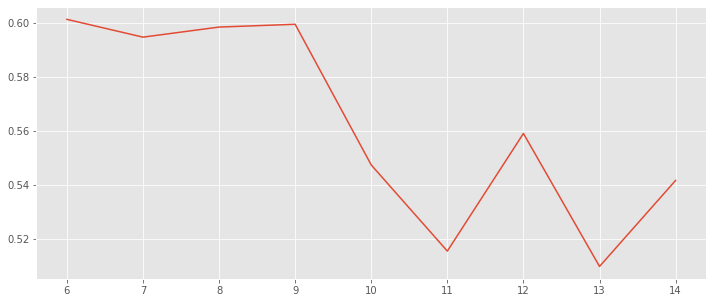

In [122]:
#from sklearn.linear_model import SGDClassifier

#skl_clf = SGDClassifier(loss='log')
#skl_clf.fit()

#cross_val_score(skl_clf, X, y_train, cv=skf, scoring='f1')

fig = plt.figure()
x = np.arange(6, 15)
y = np.zeros(9)
a = np.zeros((9, 3))

for i in range(1, 10):
    clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=50, model_type='log_reg', batch_size=20, border=(5 + i) / 20)
    clf.fit(X, y_train)
    a[i - 1] = cross_val_score(clf, X, y_train, cv=skf.split(X, y_train, groups_train), scoring='f1')
    y[i - 1] = a[i - 1].mean()
    print(i, a[i - 1])

plt.plot(x, y)

1 [0.48997465 0.4965035  0.44657097]
2 [0.52275078 0.6135182  0.45402766]
3 [0.56917808 0.61114983 0.50407283]
4 [0.57122758 0.61841634 0.51638142]
5 [0.56978654 0.62044653 0.61311363]
6 [0.56040423 0.61975413 0.60093271]


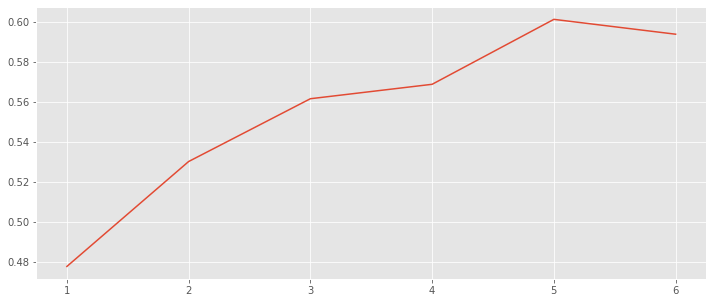

In [123]:
fig = plt.figure()
x = np.arange(1, 7)
y = np.zeros(6)
a = np.zeros((6, 3))

for i in range(1, 7):
    clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=50, model_type='log_reg', batch_size=20, border=i / 20)
    clf.fit(X, y_train)
    a[i - 1] = cross_val_score(clf, X, y_train, cv=skf.split(X, y_train, groups_train), scoring='f1')
    y[i - 1] = a[i - 1].mean()
    print(i, a[i - 1])

plt.plot(x, y)

9 [0.45823096 0.46373218 0.48972189]
10 [0.44692737 0.49519231 0.34830684]
11 [0.42165605 0.25375375 0.37694915]
12 [0.48617512 0.47472256 0.0801364 ]
13 [0.21044547 0.27373068 0.03157895]
14 [0.30242511 0.27366864 0.05381944]


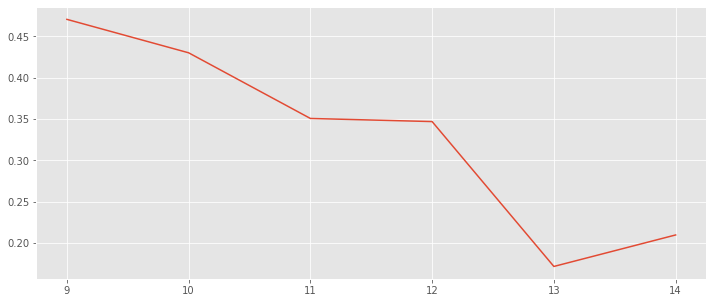

In [130]:
fig = plt.figure()
x = np.arange(9, 15)
y = np.zeros(6)
a = np.zeros((6, 3))

for i in range(9, 15):
    clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=50, model_type='log_reg', batch_size=20, border=(5 + i) / 20)
    #clf.fit(X, y_train)
    a[i - 9] = cross_val_score(clf, X, y_train, cv=skf.split(X, y_train, groups_train), scoring='f1')
    y[i - 9] = a[i - 9].mean()
    print(i, a[i - 9])

plt.plot(x, y)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [126]:
skf = StratifiedKFold(n_splits=3)
clf = MySGDClassifier(batch_generator, C=10000, alpha=0.8, max_epoch=1000, model_type='log_reg', batch_size=20, border=1/4)
clf.fit(X, y_train)
#cross_val_score(clf, X, y_train, cv=skf.split(X, y_train, groups_train), scoring='f1')

MySGDClassifier(C=10000, alpha=0.8,
                batch_generator=<function batch_generator at 0x7fcb144c3710>,
                batch_size=20, border=0.25, max_epoch=1000,
                model_type='log_reg')

In [134]:
test_data = pd.read_csv('/content/test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    pair_id = new_doc['pair_id']
    #target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, pair_id))

In [136]:
#y_train = []
X_test = []
groups_test = []
test_ids = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, pair_id) in enumerate(docs):
        #y_test.append(target_id)
        test_ids.append(pair_id)
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, _ = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
#y_train = np.array(y_train)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [113]:
Xtest = scaler.transform(X_test)

In [125]:
res = clf.predict(Xtest)

In [140]:
result = pd.DataFrame({'pair_id': np.asarray(test_ids), 'target': res})
result.to_csv('predict.csv', index=False)

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***